In [94]:
import time
import numpy as np
import pandas as pd

# Decomposition
# !pip install umap-learn
import umap
import sklearn.decomposition as skld

# Clustering
import sklearn.cluster as sklc
import scipy.cluster.hierarchy as sch
import scipy.spatial.distance as ssd


# Visualization
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
# Mount drive folder
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/Q7/TAED2/TechLoan/TDD/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,AVG_DURATION,AVG_LINES_ADDED,AVG_LINES_REMOVED,COUNT_REFACTS,COUNT_SOLVED,FILES_CHANGED,FIXED_ISSUES,INDUCED_ISSUES,COMMIT_HASH,PROJECT_ID
0,0.0,14.524154,4.186322,0.405473,0.0,3.422886,0.0,0.0,402,1
1,0.0,8.843750,3.168750,2.625000,0.0,3.375000,0.0,0.0,8,1
2,0.0,2.000000,2.000000,0.000000,0.0,1.000000,0.0,0.0,1,1
3,0.0,33.000000,1.000000,0.000000,0.0,1.000000,0.0,0.0,2,1
4,0.0,13.329991,4.546024,0.000000,0.0,2.354167,0.0,0.0,48,1


In [83]:
df = pd.read_csv(path + "committer-level_dataframe.csv")

# Data used by the clustering methods should not include the names of the committers
data = df.loc[:, df.columns != 'COMMITTER']

In [79]:
def plot_data(data, mode=None, clusters=None, title=None):
    if mode is None or mode == "umap":
        x = umap.UMAP().fit_transform(data)
    elif mode == "pca":
        x = skld.PCA().fit_transform(data)
    else:
        print("mode does not exist")
        return

    if clusters is not None:
        plt.scatter(x[:,0], x[:,1], c = clusters)
    else:
        plt.scatter(x[:,0], x[:,1])
    if title is not None:
        plt.title(title)

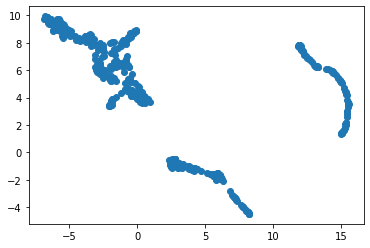

In [77]:
plot_data(data)

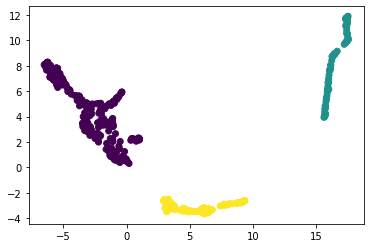

In [92]:
hac_ward = sklc.AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
x = umap.UMAP().fit_transform(data)
clusters = hac_ward.fit_predict(x)
plot_data(data, clusters=clusters)

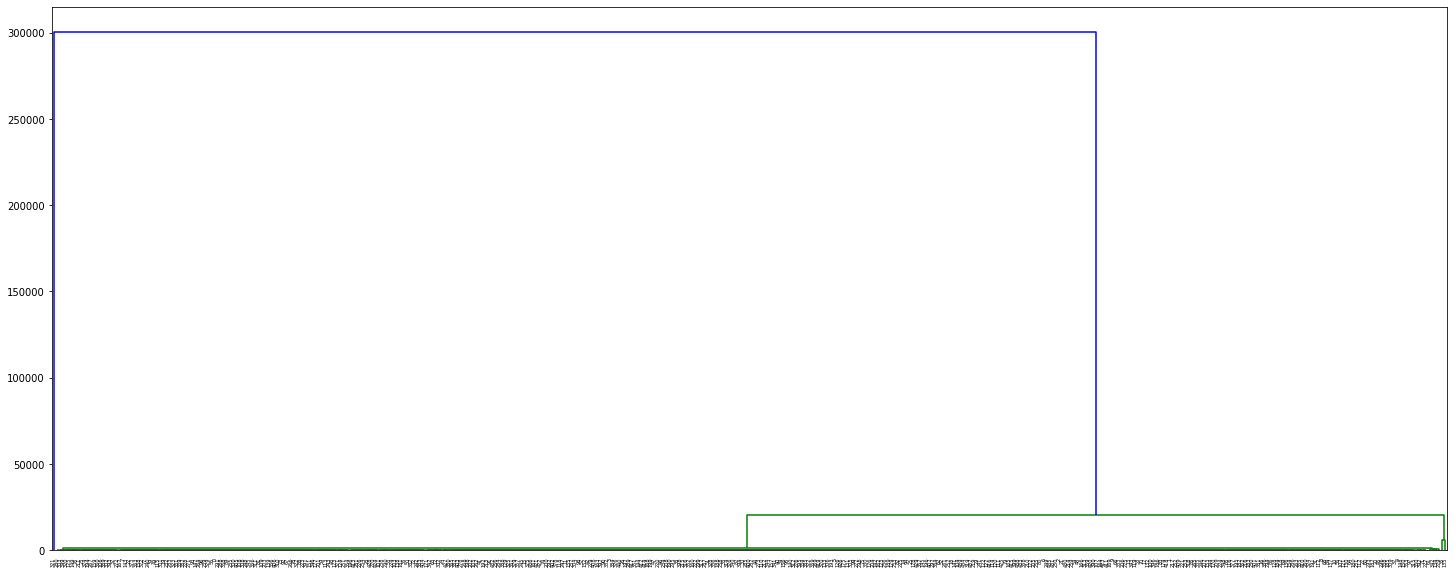

In [99]:
linked = sch.linkage(data, method='single', metric='euclidean')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(linked)

In [ ]:
## Hierarchical agglomerative clustering ##

# linkage ward
sklc.AgglomerativeClustering(n_clusters=2, *, affinity='euclidean', memory=None, connectivity=None, compute_full_tree='auto', linkage='ward', distance_threshold=None, compute_distances=False)

# linkage complete
sklc.AgglomerativeClustering(n_clusters=2, *, affinity='euclidean', memory=None, connectivity=None, compute_full_tree='auto', linkage='ward', distance_threshold=None, compute_distances=False)
 
# linkage average
sklc.AgglomerativeClustering(n_clusters=2, *, affinity='euclidean', memory=None, connectivity=None, compute_full_tree='auto', linkage='ward', distance_threshold=None, compute_distances=False)
 
# linkage single
sklc.AgglomerativeClustering(n_clusters=2, *, affinity='euclidean', memory=None, connectivity=None, compute_full_tree='auto', linkage='ward', distance_threshold=None, compute_distances=False)

